# Notebook Imports

In [5]:
# Read in our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

titanic = pd.read_csv('../../../data/titanic.csv',
                      usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
titanic.head() 

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


## Plot Continuous Features

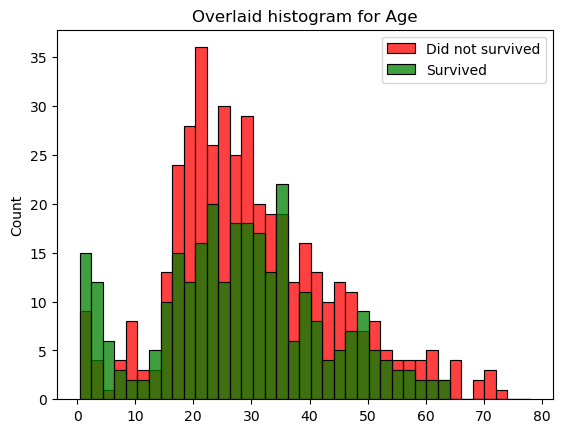

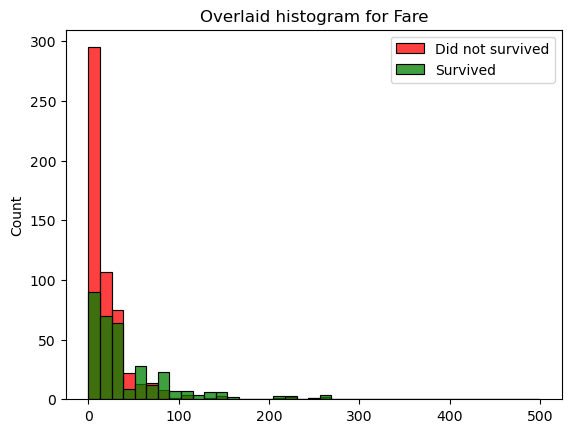

In [6]:
# Plot overlaid histograms for continuous features
for i in ["Age", "Fare"]:
    died = list(titanic[titanic["Survived"] == 0][i].dropna())
    survived = list(titanic[titanic["Survived"] == 1][i].dropna())
    
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    
    plt.legend(["Did not survived", "Survived"])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()

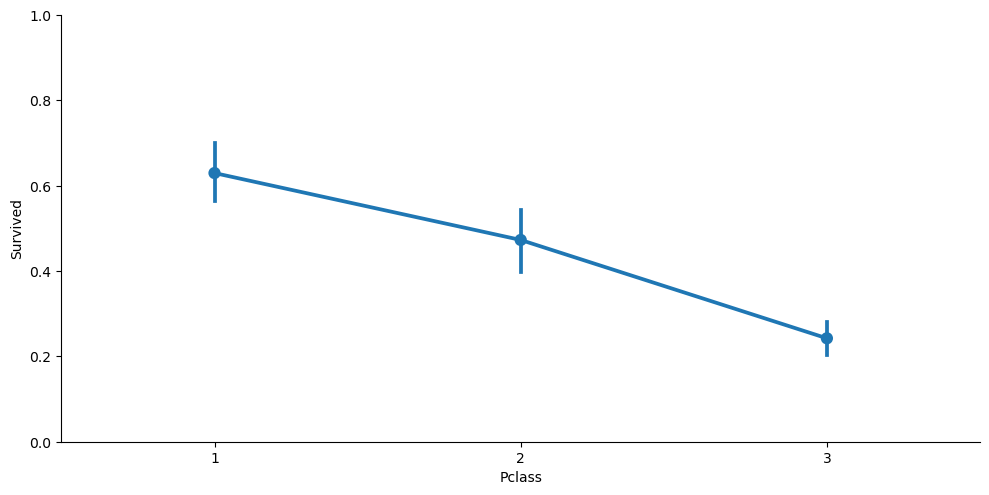

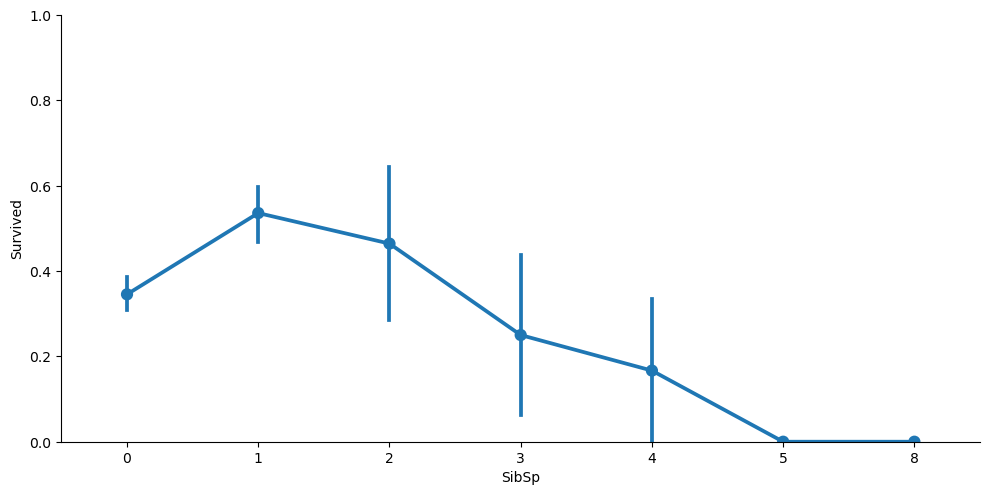

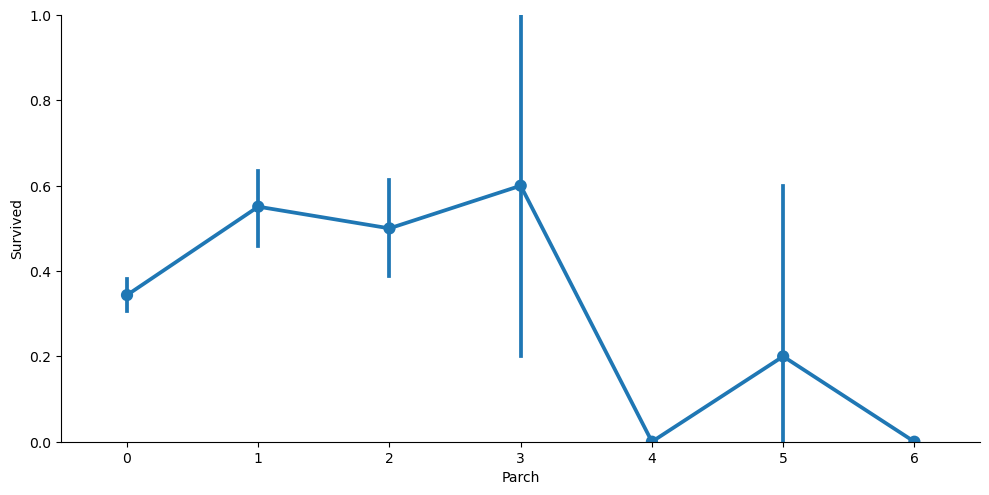

In [7]:
# Generate categorical plots for ordinal features
for col in ["Pclass", "SibSp", "Parch"]:
    sns.catplot(x=col, y="Survived", data=titanic, kind='point',aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

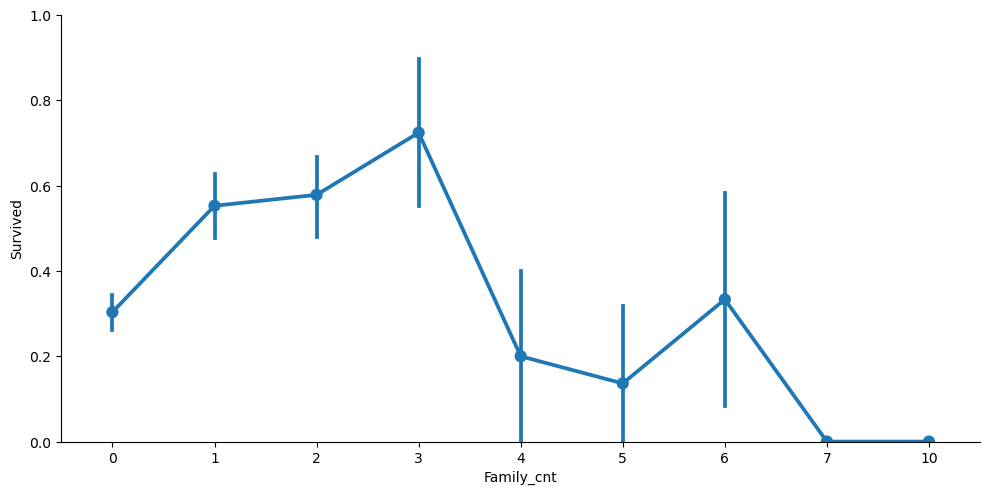

In [8]:
# Create a new family count feature
titanic["Family_cnt"] = titanic["SibSp"] + titanic['Parch']
sns.catplot(x="Family_cnt", y="Survived", data=titanic, kind='point',aspect=2, )
plt.ylim(0, 1)